In [75]:
import pandas as pd
import seaborn as sns
import numpy as np

In [76]:
#df = pd.read_csv('Data_Latest.csv')

df = pd.read_csv('data.csv')
print(list(df.columns))

df['goal'] = df['goal'] - 1

# df.loc[df['trajectory_id'] == 54, 'goal'] = 5


unique_trajectory_ids = df[df['goal'] == -1]['trajectory_id'].unique()
print(unique_trajectory_ids)

df = df.drop('trajectory_id', axis=1)
# df = df.drop('velocity_scalar', axis=1)
df = df.drop('id', axis=1)
df = df.drop('id_prefix', axis=1)
# df = df.drop('orientation', axis=1)
df = df.drop('timestamp', axis=1)
df = df.drop('workstation', axis=1)
df = df.drop('start', axis=1)

df.isna().sum()

['id_prefix', 'id', 'x', 'y', 'velocity_scalar', 'orientation', 'timestamp', 'workstation', 'trajectory_id', 'start', 'goal']
[]


x                  0
y                  0
velocity_scalar    0
orientation        0
goal               0
dtype: int64

In [77]:
df.head()

,x,y,velocity_scalar,orientation,goal
0,-3.589101,11.984667,0.100631,268.810901,5.0
1,-3.582266,11.847101,0.307469,274.076797,5.0
2,-3.581539,11.687327,0.596281,271.412838,5.0
3,-3.586045,11.523435,0.866437,269.604311,5.0
4,-3.590900,11.350247,1.158586,269.176893,5.0


In [78]:
#df = df.drop('series_id', axis=1)
df.columns

Index(['x', 'y', 'velocity_scalar', 'orientation', 'goal'], dtype='object')

In [79]:
features = list(df.columns)
features.remove("goal")
features

['x', 'y', 'velocity_scalar', 'orientation']

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,x,y,velocity_scalar,orientation,goal
0,0.391960,0.971249,0.000080,0.746686,5.0
1,0.392514,0.965673,0.029700,0.761315,5.0
2,0.392573,0.959198,0.071059,0.753914,5.0
3,0.392208,0.952555,0.109747,0.748890,5.0
4,0.391814,0.945536,0.151584,0.747703,5.0


In [81]:
import numpy as np
import pandas as pd
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(0, len(data) - seq_length, round(seq_length/2)):
        x = data[i:i+seq_length][['x', 'y', 'velocity_scalar', 'orientation']].values
        y0 = data.iloc[i]['goal']
        y = data.iloc[i+seq_length]['goal']
        #xs.append(x)
        #ys.append(y)
        if y0 == y:
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)
SEQ_LENGTH = 25
x_data, y_data = create_sequences(df, SEQ_LENGTH)
print(len(y_data))

2749


In [82]:
print(x_data[1])

[[0.39618709 0.87438634 0.43532912 0.75347873]
 [0.39626262 0.86576564 0.45635743 0.75312929]
 [0.39652173 0.85724577 0.47166636 0.75329317]
 [0.39730255 0.84890717 0.48256425 0.75449548]
 [0.39856283 0.84126318 0.4839444  0.75618755]
 [0.39945581 0.83377471 0.48652397 0.75619974]
 [0.40002345 0.82613634 0.49275003 0.75570332]
 [0.40050893 0.81895894 0.4903639  0.7555475 ]
 [0.4010423  0.81203601 0.48754861 0.75567656]
 [0.40145375 0.80551767 0.48070439 0.75551785]
 [0.40218596 0.79872711 0.48165908 0.75618442]
 [0.40274568 0.79116325 0.49234701 0.75592634]
 [0.40402147 0.78350452 0.49814184 0.75753121]
 [0.40572107 0.77611564 0.49836954 0.7593019 ]
 [0.40794947 0.76911406 0.49367313 0.76166819]
 [0.41098781 0.76208761 0.49348585 0.76500918]
 [0.41412875 0.75465064 0.49956802 0.7671238 ]
 [0.41714304 0.74657897 0.51145202 0.76823801]
 [0.419392   0.73926815 0.50708298 0.7681801 ]
 [0.42120169 0.73058763 0.52582733 0.76708931]
 [0.42360592 0.72145427 0.54256719 0.76801559]
 [0.42580897 

In [83]:
type(x_data)

numpy.ndarray

In [84]:
# Placeholder lists for the final training and test sets
x_train_list, x_test_list = [], []
y_train_list, y_test_list = [], []
for label in df['goal'].unique():
    x_data_class, y_data_class = create_sequences(df[df['goal'] == label], SEQ_LENGTH)
    train_size = int(len(x_data_class) * 0.8)

    # Split the data for this class
    x_train_class, x_test_class = x_data_class[:train_size], x_data_class[train_size:]
    y_train_class, y_test_class = y_data_class[:train_size], y_data_class[train_size:]

    # Append to the final lists
    x_train_list.append(x_train_class)
    x_test_list.append(x_test_class)
    y_train_list.append(y_train_class)
    y_test_list.append(y_test_class)

# Concatenate data from all classes to get the final training and test sets
x_train = np.concatenate(x_train_list, axis=0)
x_test = np.concatenate(x_test_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

In [85]:
# For training data
unique_labels_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels_train, counts_train):
    print(f"Label {label} in training data: {count} instances")

print("\n")  # Just to separate the outputs

# For test data
unique_labels_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_labels_test, counts_test):
    print(f"Label {label} in test data: {count} instances")

Label 0.0 in training data: 552 instances
Label 1.0 in training data: 426 instances
Label 2.0 in training data: 403 instances
Label 3.0 in training data: 520 instances
Label 4.0 in training data: 556 instances
Label 5.0 in training data: 515 instances


Label 0.0 in test data: 139 instances
Label 1.0 in test data: 107 instances
Label 2.0 in test data: 101 instances
Label 3.0 in test data: 130 instances
Label 4.0 in test data: 140 instances
Label 5.0 in test data: 129 instances


In [86]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization, Dense, Flatten

metrics = [SparseCategoricalAccuracy(name="accuracy")]

model = Sequential()
model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 4)))
model.add(BatchNormalization())
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(50, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
#!pip install keras-tuner

In [100]:
from tensorflow.python.client import device_lib
import tensorflow as tf
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())
print(tf.config.list_physical_devices('GPU'))

['/device:CPU:0']
[]


In [5]:
import tensorflow as tf;print(tf.__version__)

AttributeError: module 'tensorflow' has no attribute '__version__'

In [89]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units_1', min_value=200, max_value=500, step=50),
        activation='relu',
        return_sequences=True,
        input_shape=(SEQ_LENGTH, 4)
    ))
    model.add(BatchNormalization())
    model.add(LSTM(
        units=hp.Int('units_2', min_value=100, max_value=300, step=50),
        activation='relu',
        return_sequences=True
    ))
    model.add(BatchNormalization())
    model.add(LSTM(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=100, max_value=300, step=50),
        activation='relu'
    ))
    model.add(Dense(6, activation='softmax'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=metrics
    )
    return model

In [93]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # or however many trials you wish to run
    #directory='C:\\Users\\evenf\\OneDrive - Universitetet i Agder\\Even and Hamza PhD project work\\Human trajectory simulations paper\\LSTM Model with Dataset\\keras_tuner_dir'
)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Trial 10 Complete [00h 01m 34s]
val_accuracy: 0.6595174074172974

Best val_accuracy So Far: 0.7305629849433899
Total elapsed time: 00h 14m 15s
INFO:tensorflow:Oracle triggered exit


In [94]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import tensorflow as tf
csv_logger = CSVLogger('logs.csv', separator = ',', append = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
def custom_lr_schedule(epoch):
    if epoch < 30:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (30 - epoch))
lr_scheduler = LearningRateScheduler(custom_lr_schedule, verbose=1)
lstm_history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=16, callbacks=[reduce_lr, lr_scheduler, csv_logger])

# Save model and history
model.save('model_lstm.keras')
np.save('history_lstm.npy',lstm_history.history)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
186/186 [==============================] - 13s 65ms/step - loss: 1.2596 - accuracy: 0.4660 - val_loss: 1.8089 - val_accuracy: 0.1743 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
186/186 [==============================] - 12s 63ms/step - loss: 1.1636 - accuracy: 0.5131 - val_loss: 1.5943 - val_accuracy: 0.3003 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
186/186 [==============================] - 12s 65ms/step - loss: 1.0888 - accuracy: 0.5347 - val_loss: 1.3677 - val_accuracy: 0.3418 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
186/186 [==============================] - 12s 67ms/step - loss: 1.2003 - accuracy: 0.4795 - val_loss: 1.4213 - val_accuracy: 0.3525 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
186/186 [===========================

In [95]:
predictions = model.predict(x_test)
classes_x=np.argmax(predictions,axis=1)

print(x_test[1].shape)
print(predictions.shape)
print(classes_x)

24/24 [==============================] - 1s 28ms/step
(25, 4)
(746, 6)
[5 5 5 5 5 5 5 0 0 0 0 5 5 4 5 4 4 5 5 5 5 5 5 5 5 0 0 5 5 5 4 4 4 4 4 5 5
 5 4 4 4 4 4 5 5 5 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 4 4 4 5 4 4 5 5 5 5 4 5 5 5 5 0 5 0 4 5 4 4 5 5 4 4 4 4 4 5 5 5 5 5 4 5 5
 5 5 5 5 5 4 5 5 5 5 0 5 5 5 5 5 5 5 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 5 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 5 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 1 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 2 3 3 3 

In [96]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=classes_x, num_classes=6)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[132,   2,   5,   0,   0,   0],
       [ 12,  92,   1,   0,   0,   2],
       [ 13,   9,  67,   1,   7,   4],
       [  9,   1,   1, 115,   4,   0],
       [  3,   3,   1,   1, 111,  21],
       [  9,   0,   0,   0,  37,  83]])>

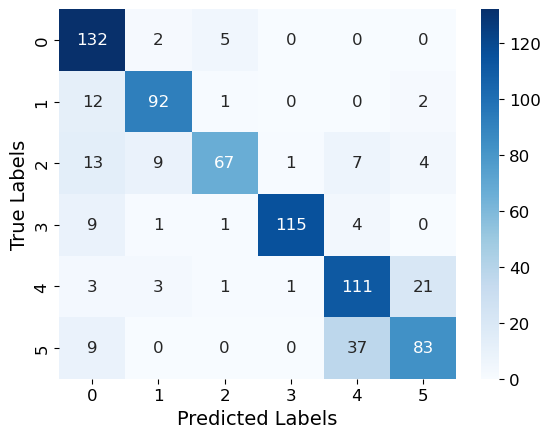

In [97]:
import matplotlib.pyplot as plt
font_style = {'family' : 'sans-serif', # 'Times New Roman'
        'weight' : 'normal',
        'size'   : 14}

font_style_nr = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

hm = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g', annot_kws={'fontdict': font_style_nr})
hm.set_xticklabels(hm.get_xticklabels(), fontdict=font_style_nr)
hm.set_yticklabels(hm.get_yticklabels(), fontdict=font_style_nr)
cbar = hm.collections[0].colorbar
# Set font style for colorbar tick labels
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_fontname('sans-serif')
    label.set_fontweight('normal')

plt.xlabel('Predicted Labels', fontdict=font_style)
plt.ylabel('True Labels', fontdict=font_style)
plt.show()

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83       139
         1.0       0.86      0.86      0.86       107
         2.0       0.89      0.66      0.76       101
         3.0       0.98      0.88      0.93       130
         4.0       0.70      0.79      0.74       140
         5.0       0.75      0.64      0.69       129

    accuracy                           0.80       746
   macro avg       0.82      0.80      0.80       746
weighted avg       0.82      0.80      0.80       746



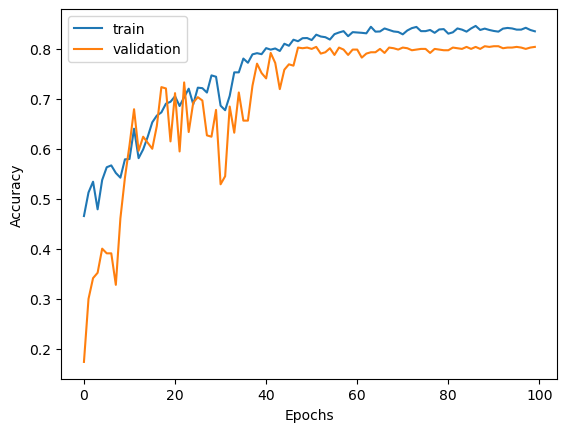

In [99]:
history = lstm_history


fig, ax = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='best')
plt.show()

image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'accuracy.pdf'

#fig.savefig(image_name, format=image_format, dpi=1200)